In [25]:
import numpy as np
import matplotlib.pyplot as plt

'''
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]
'''

def plot_number_of_steps_single_model(total_steps, n_array, alpha_array, model_path = False):
    plt.scatter([alpha_array],[total_steps], c = n_array, alpha = 0.2)
    plt.colorbar()
    plt.yscale("log")
    plt.ylabel("# steps")
    plt.xlabel(r"$\alpha$")
    if model_path:
        title = model_path.split("/")[-1]
        plt.title("model: " + title)
    plt.show()

def do_evaluation_for_single_model(saved_eval_path):
    model_path,n_array, alpha_array, energies_array_mean, _ , total_steps = np.load(saved_eval_path, allow_pickle=True)
    plot_number_of_steps_single_model(total_steps, n_array, alpha_array, model_path[0])
    
def do_evaluation_multiple_models(saved_eval_path_list):
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))
    def plot_number_of_steps(total_steps, alpha_array, model_path = False):
        ax[0].scatter([alpha_array],[total_steps], alpha = 0.2, label = model_path)
    def plot_trajectory_mean(energies_array_mean, model_path):
        ax[1].plot(np.arange(0,len(energies_array_mean),1), energies_array_mean, alpha = 0.2, label = model_path)

    for saved_eval_path in saved_eval_path_list:
        model_path,n_array, alpha_array, energies_array_mean, _ , total_steps = np.load(saved_eval_path, allow_pickle=True)
        plot_number_of_steps(total_steps, alpha_array, model_path[0])
        plot_trajectory_mean(energies_array_mean, model_path[0])
    
    ax[0].set_yscale("log")
    ax[0].set_ylabel("# steps")
    ax[0].set_xlabel(r"$\alpha$")
    ax[0].legend()

    ax[1].set_yscale("log")
    ax[1].set_ylabel("# violated clauses / m")
    ax[1].set_xlabel("steps")
    ax[1].legend()

def benchmark_two_models(saved_eval_path1, saved_eval_path2, color_coded = "n"):
    model_path1,n_array1, alpha_array1, _ , total_steps1 = np.load(saved_eval_path1, allow_pickle=True)
    model_path2,n_array2, alpha_array2, _ , total_steps2 = np.load(saved_eval_path2, allow_pickle=True)
    title1 = model_path1.split("/")[-1]
    title2 = model_path2.split("/")[-1]
    x = np.arange(np.min([np.min(total_steps1), np.min(total_steps2)]), np.max([np.max(total_steps1), np.max(total_steps2)]), 100)
    plt.plot(x, x, label = "f(x) = x")
    if color_coded == "n":
        plt.scatter(total_steps1,total_steps2, c = n_array1, alpha = 0.2)
        plt.colorbar()
    if color_coded == "alpha":
        plt.scatter(total_steps1,total_steps2, c = alpha_array1, alpha = 0.2)
        plt.colorbar()
    plt.yscale("log")
    plt.xscale("log")
    plt.ylabel("# steps")
    plt.xlabel(r"$\alpha$")
    plt.legend()
    plt.title(title1 + " vs. " + title2)
    plt.show()
    

In [20]:
model_path,n_array, alpha_array, energies_array_mean, _ , total_steps = np.load("/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/uniform_total_eval.npy", allow_pickle=True)
print(model_path)
# plot_number_of_steps(total_steps, n_array, alpha_array)


['uniform']


[ 99 100 199 200 299 300]
264


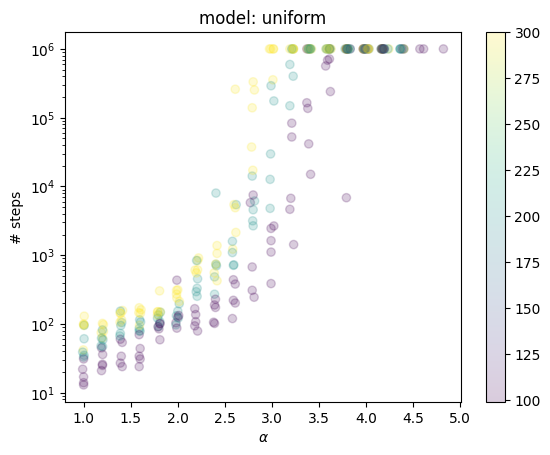

In [21]:
plot_number_of_steps_single_model(total_steps, n_array, alpha_array, model_path[0])

In [10]:
import plotly.express as px
# df = px.data.tips()
df = {"alpha": alpha_array, "num_steps": total_steps, "n": n_array}
fig = px.scatter(df, x="alpha", y="num_steps", color="n",
                 title="numsteps of moser as a function of alpha")

fig.show()

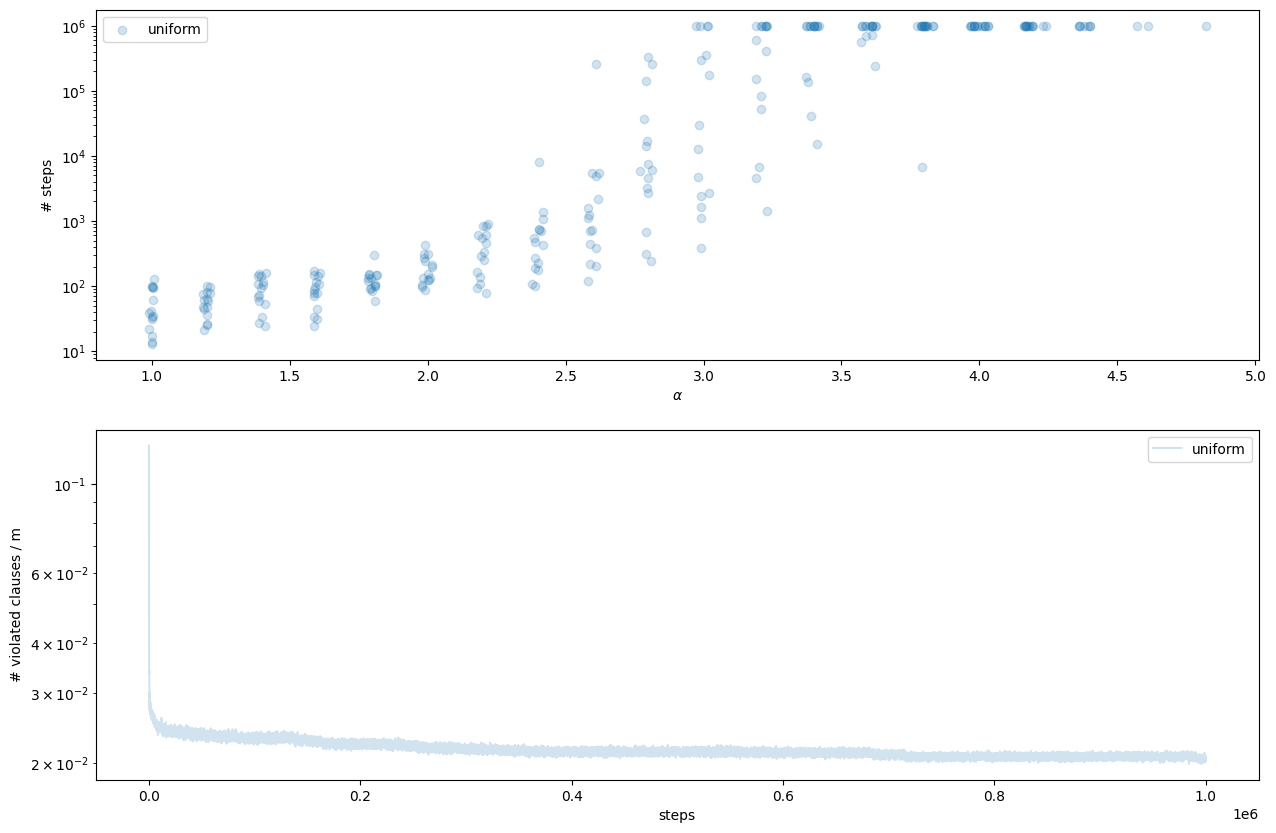

In [26]:
saved_eval_path_list = ["/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT/uniform_total_eval.npy"]
do_evaluation_multiple_models(saved_eval_path_list)

for saved_eval_path in saved_eval_path_list:
    do_evaluation_for_single_model(saved_eval_path)